<a href="https://colab.research.google.com/github/PrabishaPradeep/Dsa/blob/main/prabisha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA PREPROCESSING**

first, import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Load the Titanic dataset into python environment

In [2]:
titanic = pd.read_csv ('/content/titanic_dataset.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. Make ‘PassengerId’ as the index column

In [3]:
titanic.set_index('PassengerId',inplace=True)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


3. Check the basic details of the dataset

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


There are 2 float data type columns, 4 integer data type columns and 5 object data type columns. Also columns 'Age', 'Cabin' and 'Embarked' have null values.

In [5]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1. About 38.4% of passengers survived.

2. The majority of passengers were in the 3rd class

3. Most passengers did not have parents or children aboard. The average number is less than 0.5, indicating that the majority of passengers were traveling alone or with fewer family members.

4. Fill in all the missing values present in all the columns in the dataset

In [6]:
titanic.isna().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


there are 177 missing values in age column,687 missing values in cabin column and 2 in embarked.
let us plot the data first.

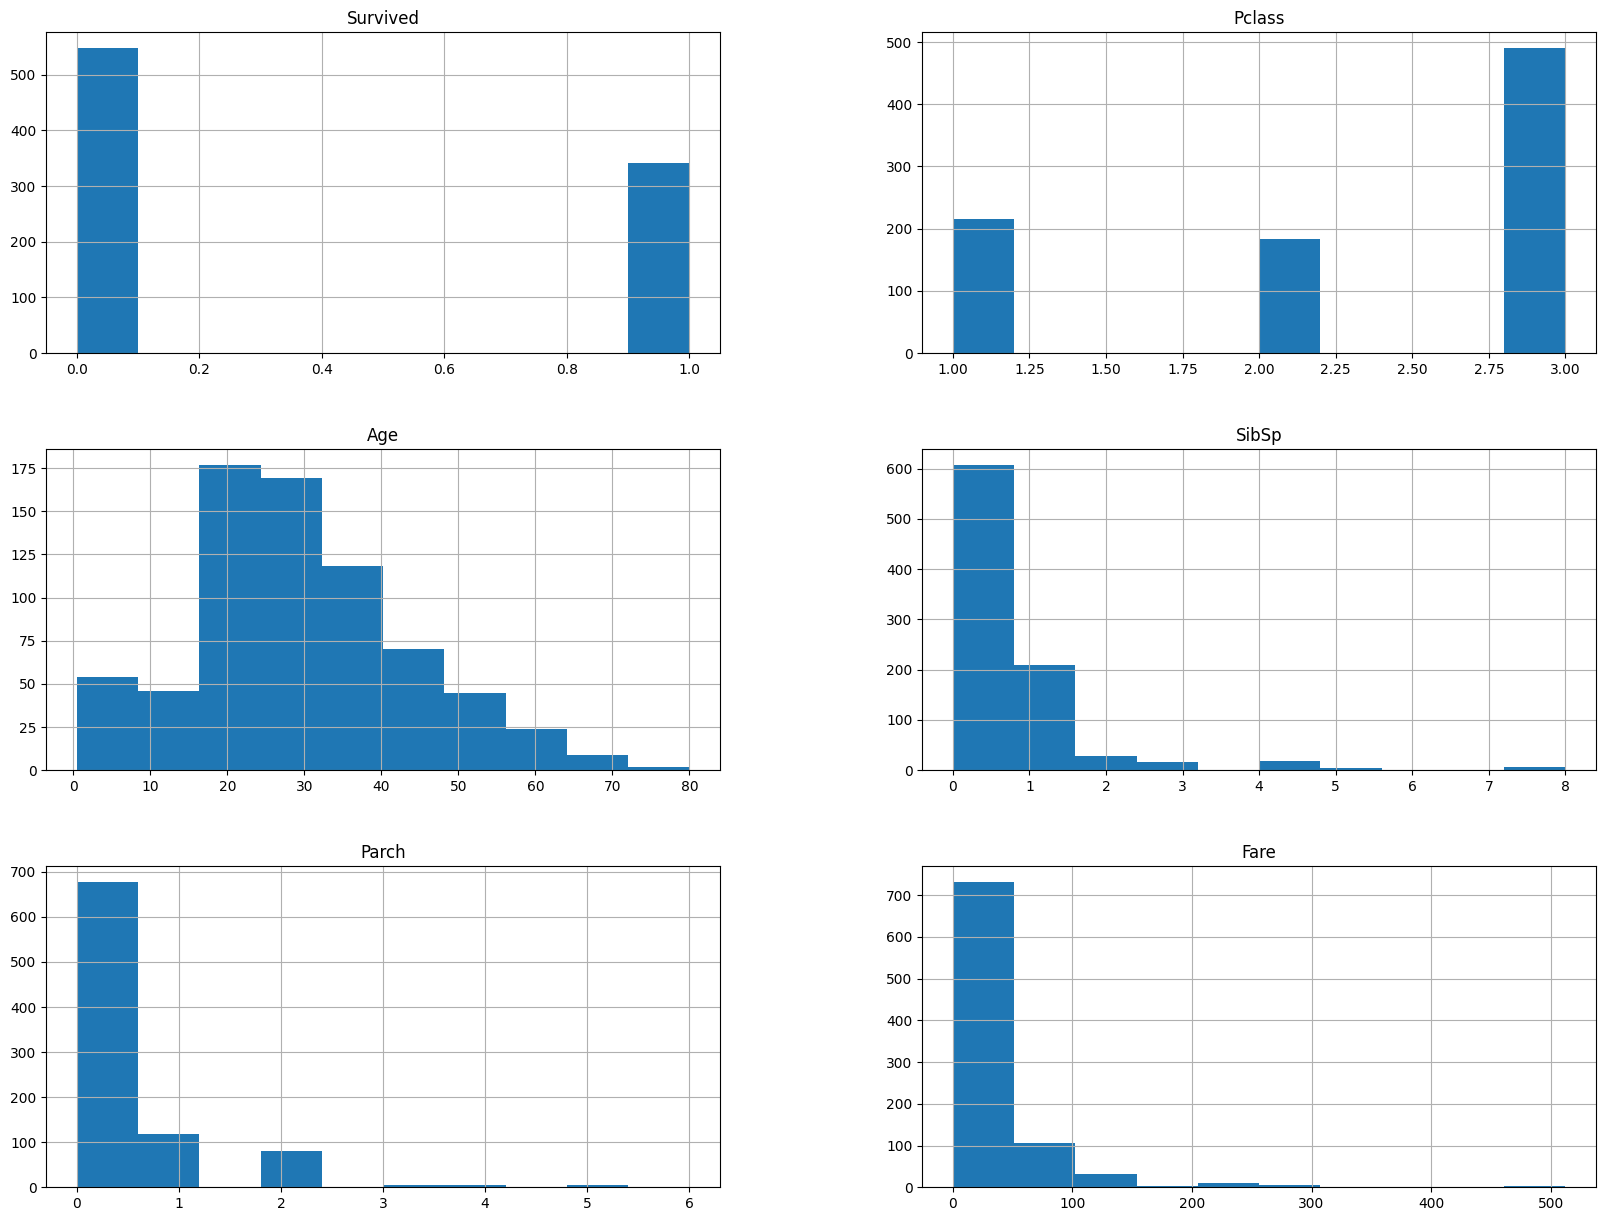

In [7]:
titanic.hist(figsize=(20,15))
plt.show()

In [8]:
titanic['Age'].skew()

0.38910778230082704

since the skewness of age data is between -0.5 and +0.5,distribution of age data is slightly symmetric and skewwd we can fill age column using median

In [9]:
titanic['Age']=titanic['Age'].fillna(titanic['Age'].median())

In [10]:
for i in ['Cabin','Embarked']:
  titanic[i]=titanic[i].fillna(titanic[i].mode()[0])

since the cabin and embarked column are categorical we can fill NA in these columns using mode.

In [11]:
titanic.isna().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0


all the missing values are replaced

5. Check and  handle outliers in at least 3 columns in the dataset

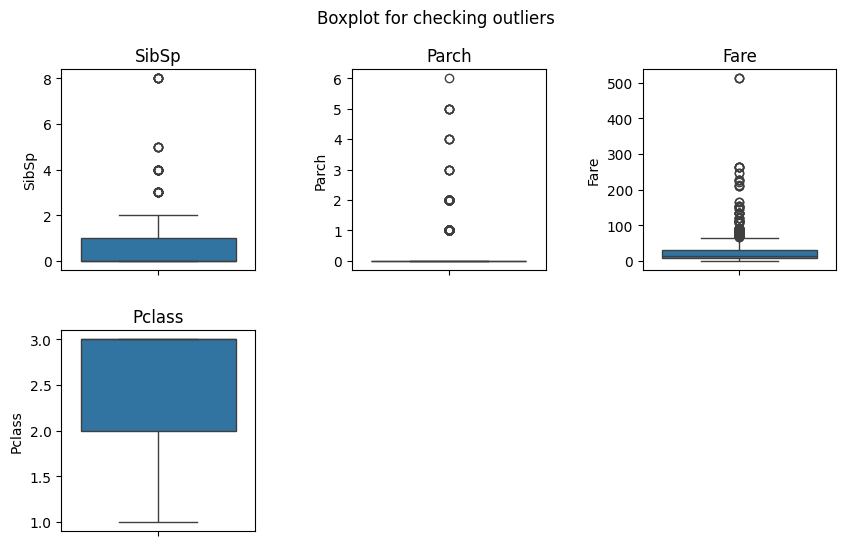

In [12]:
plt.suptitle('Boxplot for checking outliers')
plt.subplot(2,3,1)
sns.boxplot(y=titanic.SibSp)
plt.title('SibSp')
plt.subplot(2,3,2)
sns.boxplot(y=titanic.Parch)
plt.title('Parch')
plt.subplot(2,3,3)
sns.boxplot(y=titanic.Fare)
plt.title('Fare')
plt.subplot(2,3,4)
sns.boxplot(y=titanic.Pclass)
plt.title('Pclass')
plt.gcf().set_figheight(6)
plt.gcf().set_figwidth(10)
plt.subplots_adjust(wspace=.5)
plt.subplots_adjust(hspace=.3)
plt.show()

The columns 'SibSp', 'Parch' and 'Fare' have outliers.

In [13]:
titanic.SibSp.skew()

3.6953517271630565

In [14]:
titanic.Parch.skew()

2.7491170471010933

In [15]:
titanic.Fare.skew()

4.787316519674893

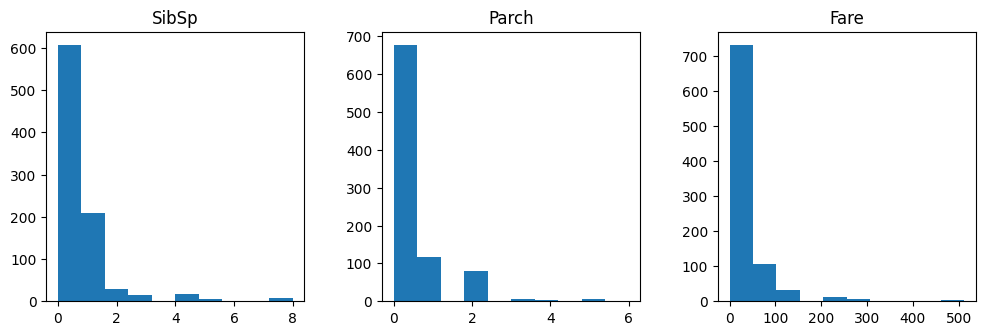

In [16]:
plt.subplot(1,3,1)
plt.hist(titanic.SibSp)
plt.title('SibSp')
plt.subplot(1,3,2)
plt.hist(titanic.Parch)
plt.title('Parch')
plt.subplot(1,3,3)
plt.hist(titanic.Fare)
plt.title('Fare')
plt.gcf().set_figheight(3.5)
plt.gcf().set_figwidth(12)
plt.subplots_adjust(wspace=.3)
plt.show()

All are right skewed distributions. So use IQR(Inter Quartile Range) method for outlier detection.

In [17]:
for i in ['SibSp','Parch','Fare']:
    Q1=np.percentile(titanic[i],25,method='midpoint')
    Q2=np.percentile(titanic[i],50,method='midpoint')
    Q3=np.percentile(titanic[i],75,method='midpoint')
    IQR=Q3-Q1
    low_lim=Q1-1.5*IQR
    up_lim=Q3+1.5*IQR
    outliers=[]
    for j in titanic[i]:
        if ((j < low_lim) | (j > up_lim)):
            outliers.append(j)
    titanic[i]=titanic[i].clip(lower=low_lim,upper=up_lim)

The detected outliers from IQR method are handled using clip function(i.e. Outliers which are greater than upper limit replaced with upper limit value and outliers which are less than lower limit replaced with lower limit value).

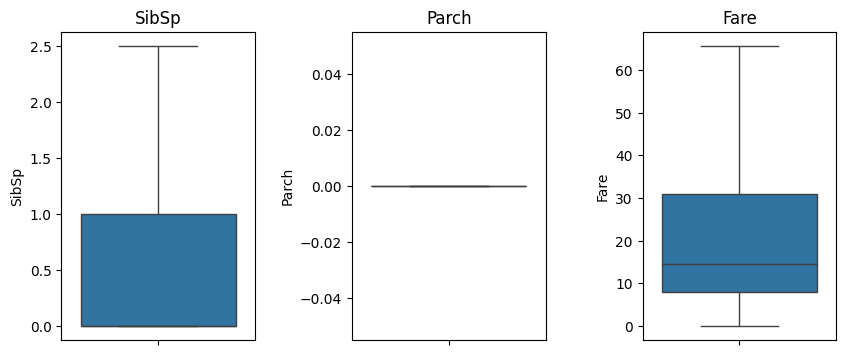

In [18]:
plt.subplot(1,3,1)
sns.boxplot(y=titanic.SibSp)
plt.title('SibSp')
plt.subplot(1,3,2)
sns.boxplot(y=titanic.Parch)
plt.title('Parch')
plt.subplot(1,3,3)
sns.boxplot(y=titanic.Fare)
plt.title('Fare')
plt.gcf().set_figheight(4)
plt.gcf().set_figwidth(10)
plt.subplots_adjust(wspace=.5)
plt.show()

Outliers are handled properly

6. Do min max scaling on the feature set (Take ‘Survived’ as target)


**Label encoding**

Since the columns 'Name' and 'Ticket' does not contribute to predict our target variable 'Survived', we should not need to encode them. Encode columns 'Sex' and 'Embarked' before scaling.

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
titanic['Sex']=le.fit_transform(titanic['Sex'])
titanic['Embarked']=le.fit_transform(titanic['Embarked'])
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1.0,0,A/5 21171,7.2500,B96 B98,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1.0,0,PC 17599,65.6344,C85,0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0.0,0,STON/O2. 3101282,7.9250,B96 B98,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1.0,0,113803,53.1000,C123,2
5,0,3,"Allen, Mr. William Henry",1,35.0,0.0,0,373450,8.0500,B96 B98,2


**Min max scaling**

Dependent variable/ Target variable, Y - Survived

Independent variables/ predictors, X - Pclass, Sex, Age, SibSp, Parch, Fare, Embarked

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
minmax=MinMaxScaler()
X=titanic[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
X_mm=minmax.fit_transform(X)
X_mm=pd.DataFrame(X_mm)

**statistical summary before and after min max scaling**

In [22]:
summary_combined = pd.concat([X.describe(), X_mm.describe()], axis=1, keys=['Before Scaling', 'After Scaling'])
summary_combined

Before Scaling                                            After Scaling  \
              Pclass         Age       SibSp  Parch        Fare             0   
count     891.000000  891.000000  891.000000  891.0  891.000000    891.000000   
mean        2.308642   29.361582    0.426487    0.0   24.046813      0.654321   
std         0.836071   13.019697    0.708246    0.0   20.481625      0.418036   
min         1.000000    0.420000    0.000000    0.0    0.000000      0.000000   
25%         2.000000   22.000000    0.000000    0.0    7.910400      0.500000   
50%         3.000000   28.000000    0.000000    0.0   14.454200      1.000000   
75%         3.000000   35.000000    1.000000    0.0   31.000000      1.000000   
max         3.000000   80.000000    2.500000    0.0   65.634400      1.000000   

                                                  
                1           2      3           4  
count  891.000000  891.000000  891.0  891.000000  
mean     0.363679    0.170595    0.0    0.366375  
std      0.163605    0.283298    0.0    0.312056  
min      0.000000    0.000000    0.0    0.000000  
25%      0.271174    0.000000    0.0    0.120522  
50%      0.346569    0.000000    0.0    0.220223  
75%      0.434531    0.400000    0.0    0.472313  
max      1.000000    1.000000    0.0    1.000000

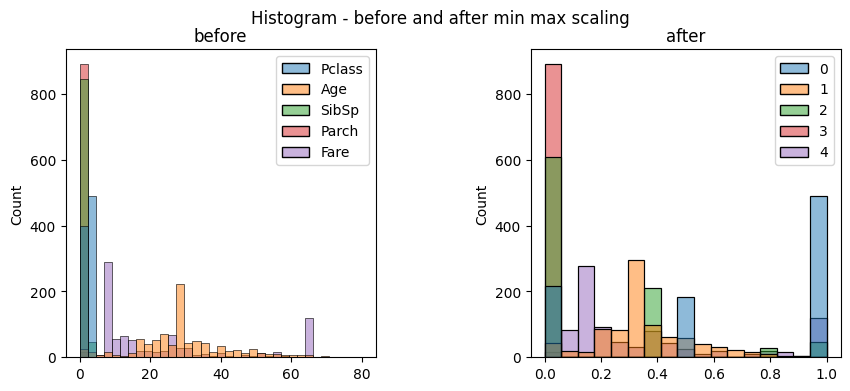

In [23]:
plt.suptitle('Histogram - before and after min max scaling')
plt.subplot(1,2,1)
plt.title('before')
sns.histplot(X)
plt.subplot(1,2,2)
plt.title('after')
sns.histplot(X_mm)
plt.gcf().set_figheight(4)
plt.gcf().set_figwidth(10)
plt.subplots_adjust(wspace=.5)
plt.show()